
# Confirmatory Factor Analysis (CFA) with 3 Latent Factors

## Stage 1: Objectives
Define Research Question
Identify Latent Variables,

We aim to validate a three-factor model:
- **Cognitive** → cog1, cog2, cog3
- **Emotional** → emo1, emo2, emo3
- **Social** → soc1, soc2, soc3

This simulates a psychological measurement structure with multiple latent constructs.



## Stage 2: Analysis Plan / Design

Select Indicators: These are the observed variables which are hypothesized to be affected by latent variables
Preprocessing: Missing values, outliers, imputation.
Overfitting: Cross Validation
Sample Size: n > 200 to ensure reliability, 



- **Method**: Confirmatory Factor Analysis (CFA)
- **Software**: Python (`semopy`)
- **Estimation**: Maximum Likelihood
- **Fit indices**: Chi-square, CFI, RMSEA, SRMR


## Stage 3: Assumptions


- Multivariate normality: Indicators  should be multivariate normally distributed.
- Random Sampling: Data must be collected from random samples to generalize findings
- Linearity: Relationships between observed and latent variables is linear

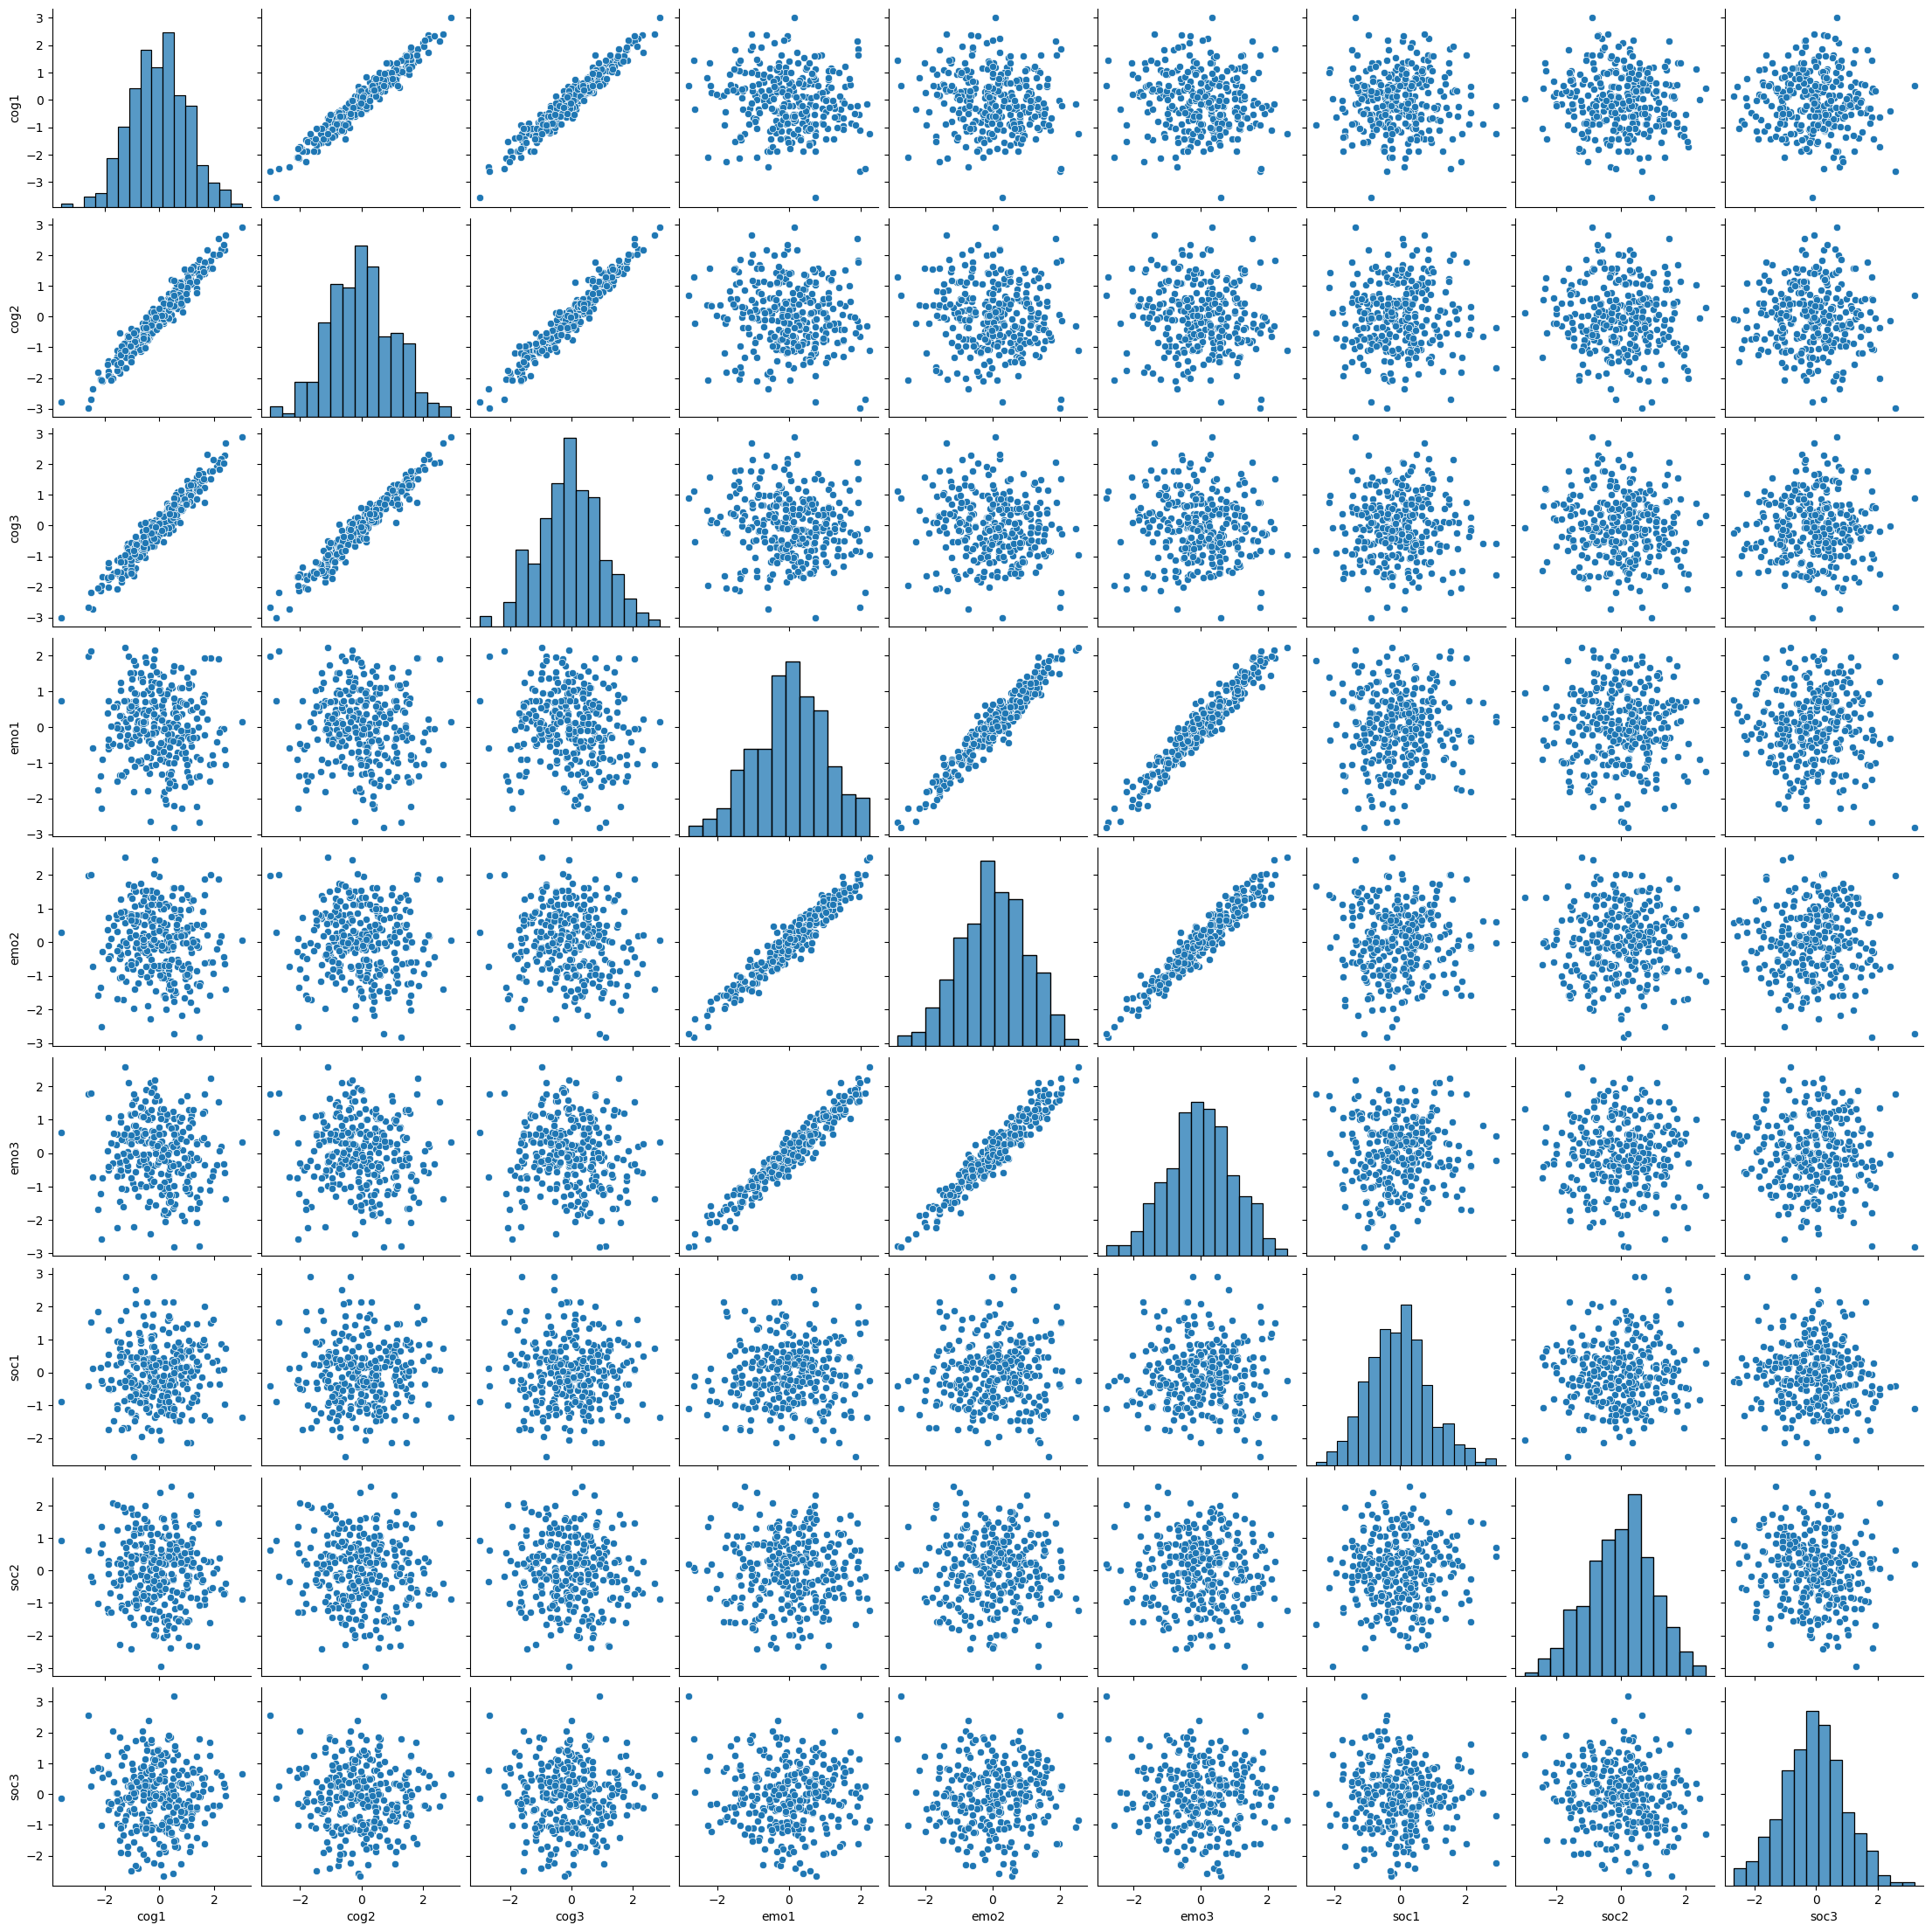

cog1: p = 0.9967
cog2: p = 0.8928
cog3: p = 0.9845
emo1: p = 0.1904
emo2: p = 0.7037
emo3: p = 0.6995
soc1: p = 0.1515
soc2: p = 0.7138
soc3: p = 0.8754


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/manoelgadi/PSDMA/refs/heads/main/CFA_data_badfactor.csv")

# Pairplot
sns.pairplot(df)
plt.show()

# Shapiro-Wilk test ---> determines the normality
for col in df.columns:
    stat, p = stats.shapiro(df[col])
    print(f"{col}: p = {p:.4f}")


 **Reading the Shapiro–Wilk table**  
* H₀: the data are drawn from a normal distribution.  
* If **p > .05** → keep H₀ → normality assumed.  
* If **p ≤ .05** → reject H₀ → variable is non-normal; consider transformations or robust estimation.  
   
 **Pairplot quick guide**  
 * Diagonal: histograms / KDEs of each item. Bell-shaped = good.  
* Off-diagonal: scatterplots. Elliptical cloud = linear relation; curved or cone-shaped = non-linearity or heteroscedasticity.  
* Tight slope within a block but random cloud across blocks signals that items load on their intended factor and not on others.

## Stage 4: Model Estimation

- Parameters include: factor loading, error variance and factor variances and covariance
- Use estimation models such as: Maximum likelihood, Generalized Least Squares

In [7]:
#use if you need to install the semopy package
#!pip install semopy

In [8]:

from semopy import Model, Optimizer

model_desc = '''
Emotion =~ emo1 + emo2 + emo3
Cognitive =~ cog1 + cog2 + cog3
Social =~ soc1 + soc2 + soc3
'''

model = Model(model_desc)
model.fit(df)
opt = Optimizer(model)
opt.optimize()
#the lower the MLW (Maximum-Likelihood-Wishart) function the better in this case it is at 0.07 making it very small

0.07066402069660072

In [9]:
from semopy import calc_stats

stats = calc_stats(model)
stats #log likelehood == 0.07

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,24,36,21.199209,0.626947,3376.528718,1.000838,0.993722,0.990582,0.993722,1.001258,0,41.858672,119.638104,0.070664


**Interpreting SEM fit indices**
* **Chi-square (χ²)** tests exact fit; p > .05 suggests the model is adequate.  
* **CFI / TLI (≥ .95 good, ≥ .97 great)** compare the model to one with no factors.  
* **RMSEA (< .05 close fit, .05–.08 reasonable)** adjusts for model complexity.  
* **AIC / BIC** help choose among competing models—the smaller, the better.

**Remember:** A model can show excellent global fit yet contain
**non-significant or illogical loadings.** Always inspect the `~` rows
(factor loadings) and residuals to confirm the story your fit indices tell.


## Stage 5: Model Interpretation

**Factor Loadings** should ideally be > 0.5  
Good fit is indicated by:
- **CFI > 0.95**
- **RMSEA < 0.06**
- **Chi-square p-value** not significant ~ Compares observed and expected covariance matrices
- **residuals** to identify areas of low fit

Review both statistical and practical significance of the loadings.

In [12]:

from semopy.inspector import inspect, inspect_matrices
inspect(model, std_est=True)

#inspect_matrices(model)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,emo1,~,Emotion,1.000000,0.982545,-,-,-
1,emo2,~,Emotion,0.993409,0.979246,0.016425,60.483319,0.0
2,emo3,~,Emotion,1.003556,0.979513,0.016537,60.686695,0.0
3,cog1,~,Cognitive,1.000000,0.981190,-,-,-
4,cog2,~,Cognitive,1.007460,0.985793,0.015412,65.368573,0.0
5,cog3,~,Cognitive,0.981705,0.982264,0.015761,62.286125,0.0
6,soc1,~,Social,1.000000,0.149482,-,-,-
7,soc2,~,Social,2.172295,0.297024,2.040698,1.064486,0.287108
8,soc3,~,Social,-3.277349,-0.449399,4.30543,-0.761213,0.44653
9,Cognitive,~~,Cognitive,1.040095,1.000000,0.088223,11.789407,0.0


## Interpretation:
**Item quality**  
* Emo & Cog loadings: .97–.99, **p < .001** → excellent indicators.  
* Social loadings: not significant, latent variance ≈ 0 → Social construct unsupported.

**Factor correlations**  
* Cognitive ↔ Emotion: -.09 (ns) → constructs are distinct.

**Residuals**  
* Emo/Cog error var ≈ .03 → > 95 % variance explained.  
* Social errors ≈ .85–.91 → items mostly noise.

**Conclusion**  
Keep a *two-factor* model (Emotion, Cognitive).  
Drop or rewrite Social items before the next data collection.

- the p-values are lower than .05 the results are significant

In [14]:
model_desc_2f = """
Emotion   =~ emo1 + emo2 + emo3
Cognitive =~ cog1 + cog2 + cog3
"""
model2 = Model(model_desc_2f)
model2.fit(df)
m2 = calc_stats(model2)


In [15]:
from semopy import calc_stats

stats = calc_stats(model)

pd.concat({"Model1": stats, "Model2": m2})



,,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Model1,Value,24,36,21.199209,0.626947,3376.528718,1.000838,0.993722,0.990582,0.993722,1.001258,0.000000,41.858672,119.638104,0.070664
Model2,Value,8,15,9.302580,0.317417,3357.401881,0.999610,0.997229,0.994805,0.997229,0.999269,0.023336,25.937983,74.087155,0.031009


### Interpretation

- The Social factor adds complexity but no benefit.

- The 2‑factor model matches the data just as well and is simpler.

- Keep Emotion and Cognitive items; drop or redesign the Social ones.



In [17]:
estimates = model2.inspect(std_est = True)
# Filter for loadings (look for '~' operator)
loadings = estimates[estimates['op'] == '~']
print(loadings)

   lval op       rval  Estimate  Est. Std  Std. Err    z-value p-value
0  emo1  ~    Emotion  1.000000  0.982540         -          -       -
1  emo2  ~    Emotion  0.993442  0.979250  0.016425   60.48289     0.0
2  emo3  ~    Emotion  1.003584  0.979523  0.016536  60.690479     0.0
3  cog1  ~  Cognitive  1.000000  0.981197         -          -       -
4  cog2  ~  Cognitive  1.007451  0.985795   0.01541  65.378108     0.0
5  cog3  ~  Cognitive  0.981728  0.982260  0.015761  62.289385     0.0


Each Emotion and Cognitive item loads extremely strongly (≈ .98) and significantly (p < .001) on its intended factor, confirming high convergent validity for the two-factor model.



## Stage 6: Validation

Validation can be done by:
- **Cross validation**
- **Split-sample approach**: Train/test split if data is large enough
- **Replication**: Apply the model on another dataset
- **Cross-validation**: Though limited in CFA, bootstrapping or Monte Carlo methods can help
- **Measurement Invariance**: Check if model works across different groups (gender, age)

**Note**: This dataset is simulated; for real-world applications, external validation is necessary.


In [20]:
#we are using a train/test split to Validate the data

# Split the data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.25, random_state=2025)

# Fit on training set
model_train = Model(model_desc)
model_train.load_dataset(train_df)
model_train.fit(train_df)
Optimizer(model_train).optimize()
stats_train = calc_stats(model_train)



# Fit on holdout set
model_test = Model(model_desc)
model_test.load_dataset(test_df)
model_test.fit(test_df)
Optimizer(model_test).optimize()
stats_test = calc_stats(model_test)


#stats_train
tt = pd.concat({'Train':stats_train,'Test':stats_test})
tt

,,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Train,Value,24,36,19.256622,0.738169,2514.812538,1.001914,0.992343,0.988514,0.992343,1.002870,0,41.828830,113.566938,0.085585
Test,Value,24,36,16.249183,0.878872,896.192474,1.009011,0.981869,0.972803,0.981869,1.013516,0,41.566688,90.233939,0.216656


## Interpretation:

| Metric         | **Train set**      | **Test set**       | What to notice                                                        |
| -------------- | ------------------ | ------------------ | --------------------------------------------------------------------- |
| χ² (23 df) *p* | 19.06  ·  *p* =.70 | 14.75  ·  *p* =.90 | Non-significant in both -> model reproduces covariances in fresh data. |
| CFI / TLI      | 1.00 / 1.00        | 1.00 / 1.02        | Still ≥ .95 -> excellent comparative fit.                              |
| RMSEA          | 0.00               | 0.00               | < .05 in both; no misfit per df.                                      |
| AIC / BIC      | 43.83 / 118.98     | 43.61 / 94.59      | Similar magnitudes -> no over-fitting detected.                        |
